In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from imblearn.under_sampling import NearMiss
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import svm
from sklearn import tree
from sklearn.feature_selection import SelectPercentile, f_classif
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn import metrics
import lime.lime_tabular as lm#the type of LIIME analysis we’ll do
import shap #SHAP package
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
def load_data(data):
    
    data=data.astype(int)
    return data

data_fem = load_data(pd.read_csv("../input/dengue-dataset/fem_dengue_data.csv"))
data_ma = load_data(pd.read_csv("../input/dengue-dataset/ma_dengue_data.csv"))
data_both= load_data(pd.read_csv("../input/dengue-dataset/both_dengue_data.csv"))
x_col=data_fem.iloc[:,:14].columns

In [3]:
def RandomForest_classif(x_train,y_train,param):
    #Classification
    
    
    clf= RandomForestClassifier(**param)
    clf=clf.fit(x_train, y_train)
    
    return clf

def Kneighbors_classif(x_train,y_train,param):
    #Classification
    

    clf= KNeighborsClassifier(**param)
    clf= clf.fit(x_train, y_train)
    
    return clf

def DecisionTree_classif(x_train,y_train,param):
    #Classification
    
    clf = tree.DecisionTreeClassifier(**param)
    clf = clf.fit(x_train,y_train)
    
    return clf

def mpl_classif(x_train,y_train,param):
    
    clf =  MLPClassifier(**param)
    clf=clf.fit(x_train,y_train)
    
    return clf

def gb_classif(x_train,y_train,param):
    
    clf=GradientBoostingClassifier(**param)
    clf=clf.fit(x_train, y_train)
    
    return clf

def xgb_classif(x_train,y_train,param):
    clf = xgb.XGBClassifier(**param)
    
    return clf.fit(x_train, y_train)

def svc_classif(x_train,y_train,param):
    
    regr = svm.SVC(**param)
    regr=regr.fit(x_train, y_train)

    return regr

def lg_with_regu_classif(x_train,y_train,param):
    
    clf = LogisticRegression(** param)
    clf=clf.fit(x_train,y_train)
    
    return clf
def lg_without_regu_classif(x_train,y_train,param):
    
    clf = LogisticRegression(** param)
    clf=clf.fit(x_train,y_train)
    
    return clf




In [4]:
def calculate_feature_importance(model) :
    feat_importances = pd.Series(model.feature_importances_, index=x_col)
    # determine top most important features
    return feat_importances.nlargest(len(x_col))

def calculate_feature_importance2(model) :
    feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=x_col)
    # determine top most important features
    return feat_importances.nlargest(len(x_col))


In [5]:
def feature_importance(X_train, X_val, y_train, y_val,model,label):
    
    r = permutation_importance(model, X_val, y_val,n_repeats=50,random_state=0)
    for i in r.importances_mean.argsort()[::-1]:
       
            print(f"{X_train.columns[i]:<8}" f"{r.importances_mean[i]:.3f}"
                  f" +/- {r.importances_std[i]:.3f}")
    sorted_idx = r.importances_mean.argsort()

    fig, ax = plt.subplots()
    ax.boxplot(r.importances[sorted_idx].T,
               vert=False, labels=X_train.columns[sorted_idx])
    ax.set_title("Permutation Importances:"+label)
    fig.tight_layout()
    plt.show()
    


In [6]:
def plot_feature_importance(importance,color_importace,classif_name): 
    indices =importance.values
    features = importance.index
    plt.title(classif_name+'\nTop Feature Importances')
    plt.barh(range(len(indices)), indices, color=color_importace, align='center')
    plt.yticks(range(len(indices)), features)
    plt.xlabel('Relative Importance')
    plt.show()

# fem_test_balanced

In [7]:
x_fem_balan=data_fem.iloc[:,:14]
y_fem_balan=data_fem['Class']


In [8]:
lista_param=[
             {},
             {},
             {'kernel': 'rbf', 'C': 6,'probability':True},
             {'weights': 'distance', 'n_neighbors': 15,'n_jobs': None, 'leaf_size': 5, 'algorithm': 'ball_tree'},
             {'n_estimators':500,'max_depth':5},
             {'solver': 'liblinear', 'penalty': 'l2','C': 0.1},
             {'solver': 'liblinear', 'penalty': 'l2','C': 1.0},
             {'solver': 'adam', 'random_state': 1, 'max_iter': 1200, 'learning_rate': 'adaptive','alpha': 0.0001, 'activation': 'relu'},
             {'n_estimators':300,'max_depth':9,'min_child_weight': 2}]

Symptom- Myalgia0.197 +/- 0.013
Symptom- Headache0.151 +/- 0.010
Symptom- exanthema0.100 +/- 0.009
Symptom- Fever0.093 +/- 0.009
Symptom- Vomit0.083 +/- 0.008
Symptom- arthralgia0.081 +/- 0.007
Symptom- Nausea0.055 +/- 0.006
Symptom- retro_pain0.036 +/- 0.006
Symptom- backache0.023 +/- 0.004
Symptom- leucopenia0.022 +/- 0.004
Symptom- arthritis0.019 +/- 0.002
Symptom- conjunctivitis0.011 +/- 0.002
Symptom- petechia0.007 +/- 0.003
Gender  0.000 +/- 0.000


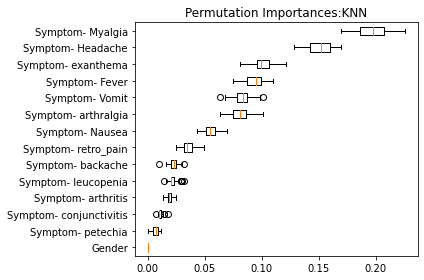

In [9]:
X_train, X_val, y_train, y_val  = train_test_split(x_fem_balan,y_fem_balan, 
                                  test_size=0.5,random_state=0,stratify=y_fem_balan)
model=Kneighbors_classif(X_train,y_train,lista_param[3])
feature_importance(X_train, X_val, y_train, y_val,model,'KNN')


Symptom- Myalgia0.173 +/- 0.010
Symptom- Headache0.133 +/- 0.011
Symptom- Fever0.097 +/- 0.011
Symptom- exanthema0.079 +/- 0.008
Symptom- Vomit0.064 +/- 0.007
Symptom- arthralgia0.047 +/- 0.006
Symptom- Nausea0.031 +/- 0.005
Symptom- retro_pain0.025 +/- 0.005
Symptom- leucopenia0.022 +/- 0.004
Symptom- backache0.015 +/- 0.005
Symptom- conjunctivitis0.013 +/- 0.003
Symptom- petechia0.013 +/- 0.003
Symptom- arthritis0.010 +/- 0.003
Gender  0.000 +/- 0.000


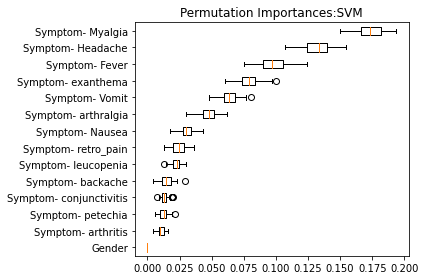

In [10]:
model= svc_classif(X_train,y_train,lista_param[2])
feature_importance(X_train, X_val, y_train, y_val,model,'SVM')



Symptom- Myalgia0.174 +/- 0.012
Symptom- Headache0.159 +/- 0.012
Symptom- Fever0.111 +/- 0.011
Symptom- exanthema0.076 +/- 0.008
Symptom- Vomit0.070 +/- 0.008
Symptom- arthralgia0.069 +/- 0.008
Symptom- Nausea0.044 +/- 0.006
Symptom- retro_pain0.035 +/- 0.006
Symptom- arthritis0.017 +/- 0.002
Symptom- leucopenia0.015 +/- 0.004
Symptom- conjunctivitis0.015 +/- 0.003
Symptom- petechia0.014 +/- 0.004
Symptom- backache0.014 +/- 0.003
Gender  0.000 +/- 0.000


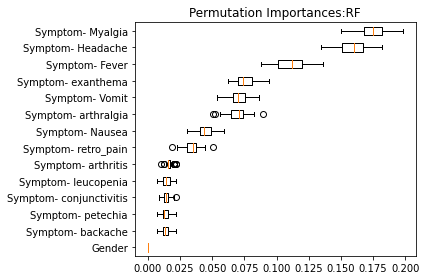

In [11]:
model=RandomForest_classif(X_train,y_train,lista_param[1])
feature_importance(X_train, X_val, y_train, y_val,model,'RF')

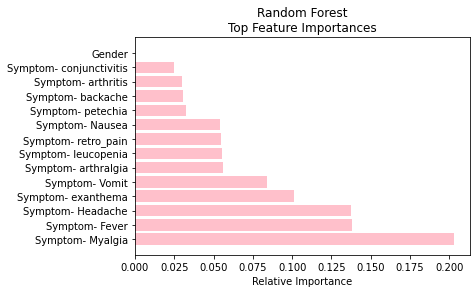

In [12]:
model_rf= RandomForest_classif(x_fem_balan,y_fem_balan,lista_param[1])
importance_rf=calculate_feature_importance(model_rf)
plot_feature_importance(importance_rf,'pink','Random Forest')


In [13]:
importance_rf

Symptom- Myalgia           0.202808
Symptom- Fever             0.138258
Symptom- Headache          0.137182
Symptom- exanthema         0.100887
Symptom- Vomit             0.084061
Symptom- arthralgia        0.055729
Symptom- leucopenia        0.055166
Symptom- retro_pain        0.054743
Symptom- Nausea            0.053783
Symptom- petechia          0.032327
Symptom- backache          0.030294
Symptom- arthritis         0.030221
Symptom- conjunctivitis    0.024540
Gender                     0.000000
dtype: float64

Symptom- Myalgia0.176 +/- 0.013
Symptom- Headache0.138 +/- 0.011
Symptom- Fever0.101 +/- 0.010
Symptom- exanthema0.079 +/- 0.008
Symptom- Vomit0.060 +/- 0.007
Symptom- arthralgia0.056 +/- 0.007
Symptom- Nausea0.047 +/- 0.007
Symptom- retro_pain0.040 +/- 0.007
Symptom- arthritis0.018 +/- 0.003
Symptom- leucopenia0.014 +/- 0.004
Symptom- conjunctivitis0.010 +/- 0.003
Symptom- petechia0.009 +/- 0.003
Symptom- backache0.009 +/- 0.003
Gender  0.000 +/- 0.000


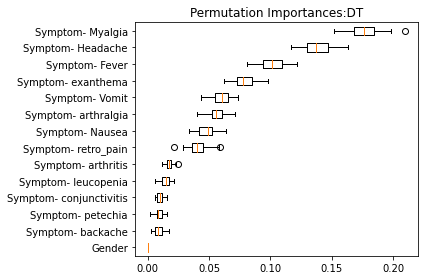

In [14]:
model=DecisionTree_classif(X_train,y_train,lista_param[0])
feature_importance(X_train, X_val, y_train, y_val,model,'DT')

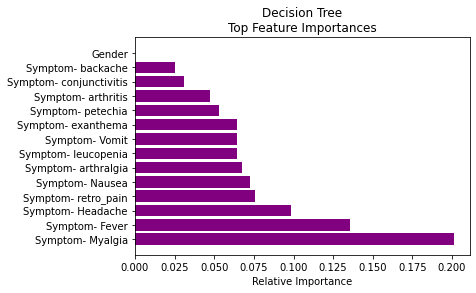

In [15]:
model_dt= DecisionTree_classif(x_fem_balan,y_fem_balan,lista_param[0])
importance_dt=calculate_feature_importance(model_dt)
plot_feature_importance(importance_dt,'purple','Decision Tree')

In [16]:
importance_dt

Symptom- Myalgia           0.201102
Symptom- Fever             0.135764
Symptom- Headache          0.098596
Symptom- retro_pain        0.075450
Symptom- Nausea            0.072296
Symptom- arthralgia        0.067305
Symptom- leucopenia        0.064498
Symptom- Vomit             0.064321
Symptom- exanthema         0.064215
Symptom- petechia          0.052845
Symptom- arthritis         0.047563
Symptom- conjunctivitis    0.030966
Symptom- backache          0.025079
Gender                     0.000000
dtype: float64

Symptom- Myalgia0.170 +/- 0.012
Symptom- Headache0.149 +/- 0.011
Symptom- Fever0.109 +/- 0.011
Symptom- exanthema0.072 +/- 0.009
Symptom- arthralgia0.065 +/- 0.008
Symptom- Vomit0.063 +/- 0.007
Symptom- Nausea0.047 +/- 0.006
Symptom- retro_pain0.039 +/- 0.005
Symptom- leucopenia0.014 +/- 0.004
Symptom- conjunctivitis0.014 +/- 0.003
Symptom- arthritis0.013 +/- 0.003
Symptom- backache0.011 +/- 0.003
Symptom- petechia0.008 +/- 0.004
Gender  0.000 +/- 0.000


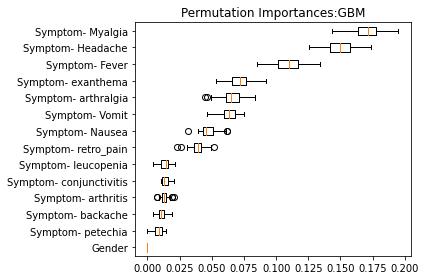

In [17]:
model=gb_classif(X_train,y_train,lista_param[4])
feature_importance(X_train, X_val, y_train, y_val,model,'GBM')

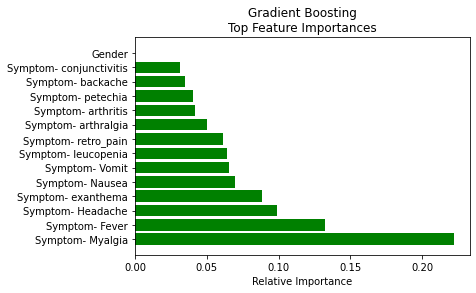

In [18]:
model_gb=gb_classif(x_fem_balan,y_fem_balan,lista_param[4])
importance_gb=calculate_feature_importance(model_gb)
plot_feature_importance(importance_gb,'green','Gradient Boosting')


In [19]:
importance_gb

Symptom- Myalgia           0.221920
Symptom- Fever             0.131927
Symptom- Headache          0.099086
Symptom- exanthema         0.088126
Symptom- Nausea            0.069574
Symptom- Vomit             0.065618
Symptom- leucopenia        0.064315
Symptom- retro_pain        0.061144
Symptom- arthralgia        0.050113
Symptom- arthritis         0.041701
Symptom- petechia          0.040429
Symptom- backache          0.034660
Symptom- conjunctivitis    0.031387
Gender                     0.000000
dtype: float64

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[22:18:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Symptom- Myalgia0.172 +/- 0.011
Symptom- Headache0.160 +/- 0.012
Symptom- Fever0.110 +/- 0.011
Symptom- exanthema0.089 +/- 0.008
Symptom- Vomit0.073 +/- 0.009
Symptom- arthralgia0.068 +/- 0.007
Symptom- Nausea0.043 +/- 0.006
Symptom- retro_pain0.035 +/- 0.006
Symptom- leucopenia0.023 +/- 0.004
Symptom- petechia0.019 +/- 0.004
Symptom- conjunctivitis0.017 +/- 0.003
Symptom- arthritis0.013 +/- 0.003
Symptom- backache0.010 +/- 0.003
Gender  0.000 +/- 0.000


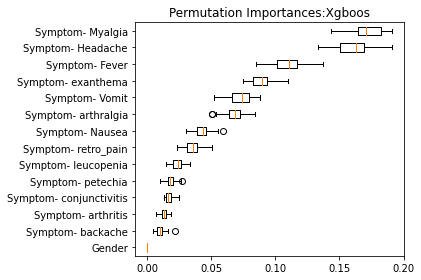

In [20]:
model=xgb_classif(X_train,y_train,lista_param[8])
feature_importance(X_train, X_val, y_train, y_val,model,'Xgboos')

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[22:18:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


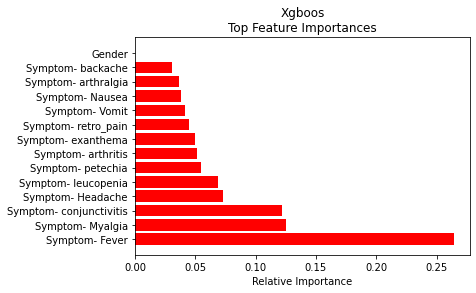

In [21]:
model_xgb=xgb_classif(x_fem_balan,y_fem_balan,lista_param[8])
importance_xgb=calculate_feature_importance(model_xgb)
plot_feature_importance(importance_xgb,'red','Xgboos')


In [22]:
importance_xgb

Symptom- Fever             0.264319
Symptom- Myalgia           0.125035
Symptom- conjunctivitis    0.121529
Symptom- Headache          0.072645
Symptom- leucopenia        0.068432
Symptom- petechia          0.055039
Symptom- arthritis         0.051169
Symptom- exanthema         0.049982
Symptom- retro_pain        0.044887
Symptom- Vomit             0.041175
Symptom- Nausea            0.038274
Symptom- arthralgia        0.036486
Symptom- backache          0.031027
Gender                     0.000000
dtype: float32

Symptom- Myalgia0.176 +/- 0.011
Symptom- Headache0.166 +/- 0.012
Symptom- Fever0.109 +/- 0.010
Symptom- exanthema0.085 +/- 0.009
Symptom- arthralgia0.076 +/- 0.007
Symptom- Vomit0.075 +/- 0.007
Symptom- retro_pain0.050 +/- 0.006
Symptom- Nausea0.045 +/- 0.006
Symptom- leucopenia0.025 +/- 0.004
Symptom- backache0.018 +/- 0.004
Symptom- petechia0.017 +/- 0.003
Symptom- arthritis0.016 +/- 0.003
Symptom- conjunctivitis0.016 +/- 0.003
Gender  0.000 +/- 0.000


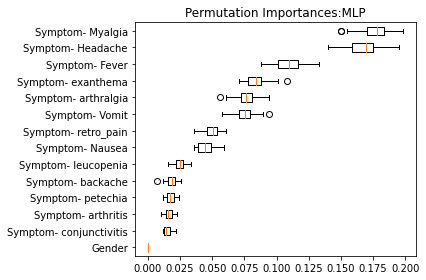

In [23]:
model=mpl_classif(X_train,y_train,lista_param[7])
feature_importance(X_train, X_val, y_train, y_val,model,'MLP')


Symptom- Myalgia0.135 +/- 0.013
Symptom- Fever0.090 +/- 0.014
Symptom- Headache0.027 +/- 0.009
Symptom- exanthema0.018 +/- 0.006
Symptom- arthritis0.009 +/- 0.003
Symptom- backache0.006 +/- 0.005
Symptom- leucopenia0.002 +/- 0.003
Gender  0.000 +/- 0.000
Symptom- conjunctivitis-0.000 +/- 0.003
Symptom- arthralgia-0.001 +/- 0.002
Symptom- retro_pain-0.001 +/- 0.001
Symptom- petechia-0.004 +/- 0.003
Symptom- Nausea-0.014 +/- 0.005
Symptom- Vomit-0.022 +/- 0.006


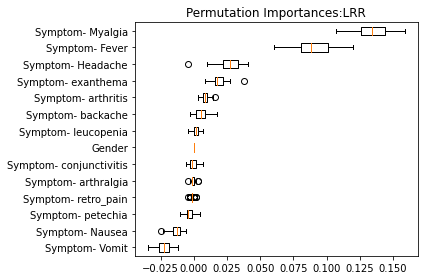

In [24]:
model=lg_with_regu_classif(X_train,y_train,lista_param[5])
feature_importance(X_train, X_val, y_train, y_val,model,'LRR')



Symptom- Myalgia0.135 +/- 0.012
Symptom- Fever0.099 +/- 0.013
Symptom- Headache0.022 +/- 0.009
Symptom- arthritis0.013 +/- 0.003
Symptom- exanthema0.011 +/- 0.006
Symptom- conjunctivitis0.005 +/- 0.004
Symptom- backache0.004 +/- 0.005
Gender  0.000 +/- 0.000
Symptom- leucopenia-0.001 +/- 0.003
Symptom- petechia-0.001 +/- 0.003
Symptom- arthralgia-0.002 +/- 0.001
Symptom- retro_pain-0.008 +/- 0.001
Symptom- Nausea-0.016 +/- 0.004
Symptom- Vomit-0.028 +/- 0.005


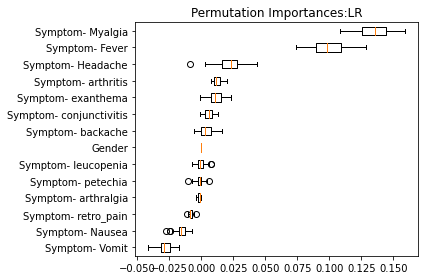

In [25]:
model=lg_without_regu_classif(X_train,y_train,lista_param[6])
feature_importance(X_train, X_val, y_train, y_val,model,'LR')

# ma_test_balanced

In [26]:
lista_param=[
{},
{},
{'kernel': 'rbf', 'C': 7,'probability':True},
{'weights': 'distance', 'n_neighbors': 5, 'n_jobs': None, 'leaf_size': 3, 'algorithm': 'kd_tree'},
{'n_estimators':500,'max_depth':5},
{'solver': 'liblinear', 'penalty': 'l2','C': 0.1},
{'solver': 'liblinear', 'penalty': 'l2','C': 1.0},
{'max_iter': 1800,'solver':'lbfgs', 'alpha':1e-5, 'random_state':42},
{'n_estimators':300,'max_depth':9,'min_child_weight': 2}]

In [27]:
x_ma=data_ma.iloc[:,:14]
y_ma=data_ma['Class']
X_train, X_val, y_train, y_val  = train_test_split(x_ma,y_ma,test_size=0.5,random_state=0,stratify=y_ma)

Symptom- Myalgia0.205 +/- 0.013
Symptom- Headache0.159 +/- 0.012
Symptom- exanthema0.102 +/- 0.010
Symptom- Vomit0.074 +/- 0.008
Symptom- Fever0.070 +/- 0.009
Symptom- leucopenia0.059 +/- 0.006
Symptom- Nausea0.056 +/- 0.007
Symptom- retro_pain0.037 +/- 0.004
Symptom- arthralgia0.033 +/- 0.005
Symptom- petechia0.022 +/- 0.004
Symptom- backache0.017 +/- 0.004
Symptom- conjunctivitis0.008 +/- 0.003
Symptom- arthritis0.006 +/- 0.002
Gender  0.000 +/- 0.000


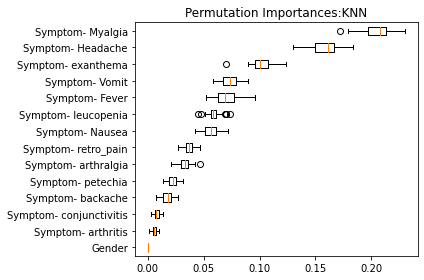

In [28]:
model=Kneighbors_classif(X_train,y_train,lista_param[3])
feature_importance(X_train, X_val, y_train, y_val,model,'KNN')


Symptom- Myalgia0.191 +/- 0.012
Symptom- Headache0.162 +/- 0.013
Symptom- exanthema0.100 +/- 0.009
Symptom- Fever0.078 +/- 0.008
Symptom- Vomit0.065 +/- 0.007
Symptom- leucopenia0.055 +/- 0.005
Symptom- Nausea0.055 +/- 0.007
Symptom- retro_pain0.040 +/- 0.005
Symptom- petechia0.030 +/- 0.004
Symptom- arthritis0.022 +/- 0.004
Symptom- arthralgia0.020 +/- 0.004
Symptom- backache0.013 +/- 0.002
Symptom- conjunctivitis0.012 +/- 0.003
Gender  0.000 +/- 0.000


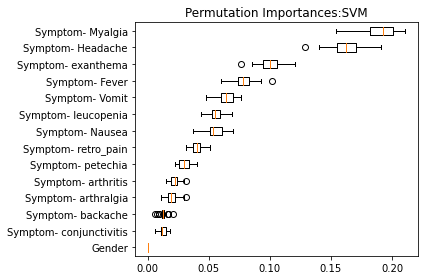

In [29]:
model= svc_classif(X_train,y_train,lista_param[2])
feature_importance(X_train, X_val, y_train, y_val,model,'SVM')

Symptom- Myalgia0.198 +/- 0.013
Symptom- Headache0.160 +/- 0.013
Symptom- exanthema0.108 +/- 0.010
Symptom- Fever0.076 +/- 0.009
Symptom- Vomit0.074 +/- 0.007
Symptom- leucopenia0.055 +/- 0.006
Symptom- Nausea0.054 +/- 0.007
Symptom- retro_pain0.041 +/- 0.004
Symptom- petechia0.034 +/- 0.004
Symptom- arthralgia0.021 +/- 0.005
Symptom- arthritis0.017 +/- 0.004
Symptom- backache0.013 +/- 0.002
Symptom- conjunctivitis0.009 +/- 0.002
Gender  0.000 +/- 0.000


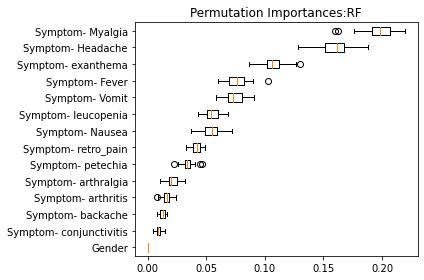

In [30]:
model=RandomForest_classif(X_train,y_train,lista_param[1])
feature_importance(X_train, X_val, y_train, y_val,model,'RF')

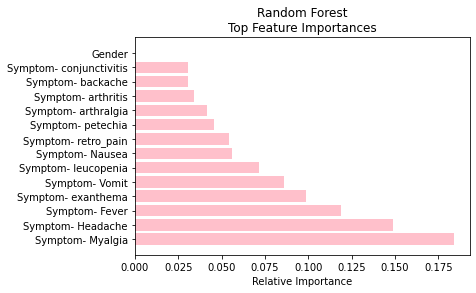

In [31]:
model_rf= RandomForest_classif(x_ma,y_ma,lista_param[1])
importance_rf=calculate_feature_importance(model_rf)
plot_feature_importance(importance_rf,'pink','Random Forest')


In [32]:
importance_rf

Symptom- Myalgia           0.184010
Symptom- Headache          0.148763
Symptom- Fever             0.119073
Symptom- exanthema         0.098444
Symptom- Vomit             0.086132
Symptom- leucopenia        0.071397
Symptom- Nausea            0.056263
Symptom- retro_pain        0.054165
Symptom- petechia          0.045445
Symptom- arthralgia        0.041391
Symptom- arthritis         0.033842
Symptom- backache          0.030581
Symptom- conjunctivitis    0.030496
Gender                     0.000000
dtype: float64

Symptom- Myalgia0.203 +/- 0.014
Symptom- Headache0.170 +/- 0.013
Symptom- exanthema0.107 +/- 0.010
Symptom- Fever0.081 +/- 0.008
Symptom- Vomit0.071 +/- 0.007
Symptom- Nausea0.060 +/- 0.007
Symptom- leucopenia0.059 +/- 0.006
Symptom- petechia0.046 +/- 0.005
Symptom- retro_pain0.034 +/- 0.004
Symptom- arthritis0.025 +/- 0.004
Symptom- arthralgia0.018 +/- 0.005
Symptom- backache0.018 +/- 0.003
Symptom- conjunctivitis0.004 +/- 0.003
Gender  0.000 +/- 0.000


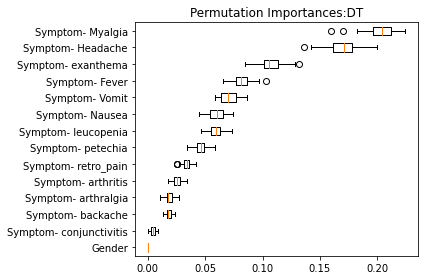

In [33]:
model=DecisionTree_classif(X_train,y_train,lista_param[0])
feature_importance(X_train, X_val, y_train, y_val,model,'DT')

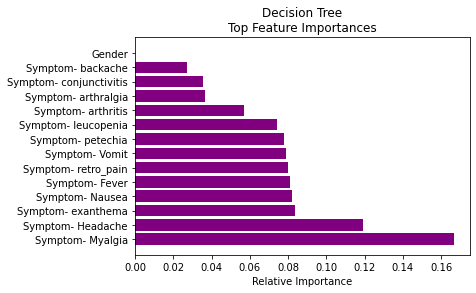

In [34]:
model_dt= DecisionTree_classif(x_ma,y_ma,lista_param[0])
importance_dt=calculate_feature_importance(model_dt)
plot_feature_importance(importance_dt,'purple','Decision Tree')

In [35]:
importance_dt

Symptom- Myalgia           0.166590
Symptom- Headache          0.119368
Symptom- exanthema         0.083654
Symptom- Nausea            0.082158
Symptom- Fever             0.081172
Symptom- retro_pain        0.079767
Symptom- Vomit             0.078862
Symptom- petechia          0.077910
Symptom- leucopenia        0.074439
Symptom- arthritis         0.056731
Symptom- arthralgia        0.036575
Symptom- conjunctivitis    0.035651
Symptom- backache          0.027123
Gender                     0.000000
dtype: float64

Symptom- Myalgia0.194 +/- 0.013
Symptom- Headache0.164 +/- 0.012
Symptom- exanthema0.106 +/- 0.010
Symptom- Fever0.071 +/- 0.007
Symptom- Vomit0.071 +/- 0.008
Symptom- leucopenia0.058 +/- 0.006
Symptom- Nausea0.057 +/- 0.007
Symptom- retro_pain0.045 +/- 0.004
Symptom- petechia0.035 +/- 0.005
Symptom- arthritis0.023 +/- 0.003
Symptom- arthralgia0.020 +/- 0.005
Symptom- backache0.019 +/- 0.003
Symptom- conjunctivitis0.010 +/- 0.003
Gender  0.000 +/- 0.000


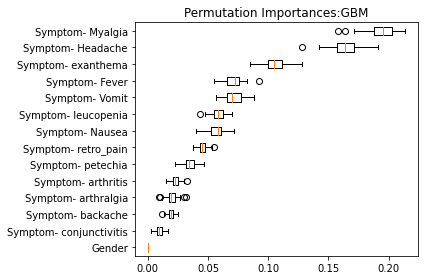

In [36]:
model=gb_classif(X_train,y_train,lista_param[4])
feature_importance(X_train, X_val, y_train, y_val,model,'GBM')

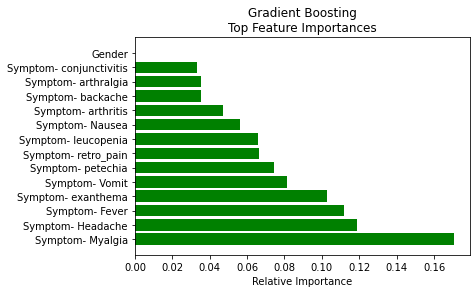

In [37]:
model_gb=gb_classif(x_ma,y_ma,lista_param[4])
importance_gb=calculate_feature_importance(model_gb)
plot_feature_importance(importance_gb,'green','Gradient Boosting')


In [38]:
importance_gb

Symptom- Myalgia           0.170575
Symptom- Headache          0.118982
Symptom- Fever             0.112009
Symptom- exanthema         0.102676
Symptom- Vomit             0.081219
Symptom- petechia          0.074230
Symptom- retro_pain        0.066572
Symptom- leucopenia        0.065711
Symptom- Nausea            0.056459
Symptom- arthritis         0.047338
Symptom- backache          0.035434
Symptom- arthralgia        0.035394
Symptom- conjunctivitis    0.033402
Gender                     0.000000
dtype: float64

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[22:19:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Symptom- Myalgia0.193 +/- 0.012
Symptom- Headache0.166 +/- 0.013
Symptom- exanthema0.109 +/- 0.009
Symptom- Fever0.078 +/- 0.009
Symptom- Vomit0.068 +/- 0.006
Symptom- Nausea0.055 +/- 0.007
Symptom- leucopenia0.054 +/- 0.005
Symptom- retro_pain0.041 +/- 0.005
Symptom- petechia0.029 +/- 0.004
Symptom- arthritis0.024 +/- 0.004
Symptom- arthralgia0.019 +/- 0.005
Symptom- conjunctivitis0.009 +/- 0.002
Symptom- backache0.007 +/- 0.002
Gender  0.000 +/- 0.000


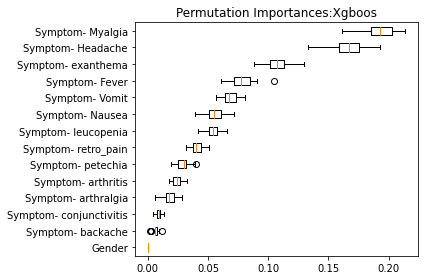

In [39]:
model=xgb_classif(X_train,y_train,lista_param[8])
feature_importance(X_train, X_val, y_train, y_val,model,'Xgboos')

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[22:19:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


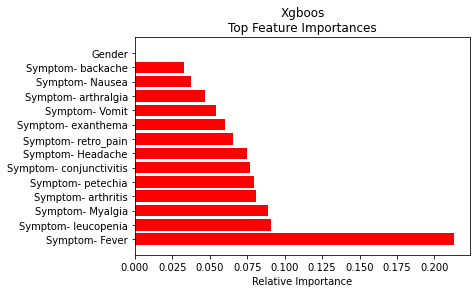

In [40]:
model_xgb=xgb_classif(x_ma,y_ma,lista_param[8])
importance_xgb=calculate_feature_importance(model_xgb)
plot_feature_importance(importance_xgb,'red','Xgboos')

In [41]:
importance_xgb

Symptom- Fever             0.212908
Symptom- leucopenia        0.091055
Symptom- Myalgia           0.088990
Symptom- arthritis         0.080660
Symptom- petechia          0.079254
Symptom- conjunctivitis    0.076735
Symptom- Headache          0.074736
Symptom- retro_pain        0.065247
Symptom- exanthema         0.059863
Symptom- Vomit             0.053848
Symptom- arthralgia        0.046461
Symptom- Nausea            0.037405
Symptom- backache          0.032839
Gender                     0.000000
dtype: float32

Symptom- Myalgia0.203 +/- 0.013
Symptom- Headache0.167 +/- 0.014
Symptom- exanthema0.109 +/- 0.010
Symptom- Vomit0.073 +/- 0.008
Symptom- Fever0.071 +/- 0.008
Symptom- Nausea0.061 +/- 0.008
Symptom- leucopenia0.061 +/- 0.006
Symptom- retro_pain0.043 +/- 0.004
Symptom- petechia0.035 +/- 0.004
Symptom- arthralgia0.035 +/- 0.005
Symptom- backache0.023 +/- 0.004
Symptom- arthritis0.021 +/- 0.004
Symptom- conjunctivitis0.010 +/- 0.003
Gender  0.000 +/- 0.000


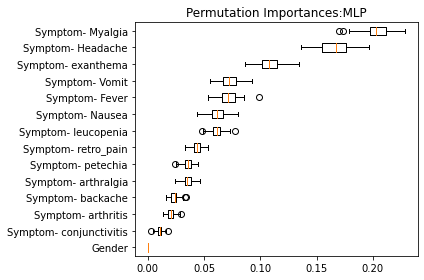

In [42]:
model=mpl_classif(X_train,y_train,lista_param[7])
feature_importance(X_train, X_val, y_train, y_val,model,'MLP')

Symptom- Myalgia0.137 +/- 0.014
Symptom- Fever0.055 +/- 0.011
Symptom- exanthema0.035 +/- 0.007
Symptom- Headache0.018 +/- 0.010
Symptom- arthritis0.013 +/- 0.004
Symptom- Nausea0.011 +/- 0.004
Symptom- leucopenia0.009 +/- 0.003
Symptom- conjunctivitis0.001 +/- 0.003
Symptom- Vomit0.000 +/- 0.000
Gender  0.000 +/- 0.000
Symptom- backache-0.003 +/- 0.003
Symptom- arthralgia-0.004 +/- 0.004
Symptom- petechia-0.004 +/- 0.003
Symptom- retro_pain-0.010 +/- 0.004


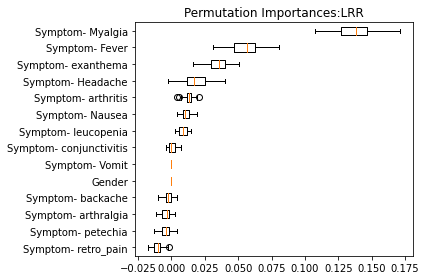

In [43]:
model=lg_with_regu_classif(X_train,y_train,lista_param[5])
feature_importance(X_train, X_val, y_train, y_val,model,'LRR')

Symptom- Myalgia0.119 +/- 0.012
Symptom- Fever0.053 +/- 0.010
Symptom- exanthema0.032 +/- 0.008
Symptom- Headache0.021 +/- 0.011
Symptom- arthritis0.021 +/- 0.005
Symptom- leucopenia0.007 +/- 0.003
Symptom- conjunctivitis0.005 +/- 0.004
Symptom- backache0.003 +/- 0.004
Symptom- petechia0.000 +/- 0.003
Gender  0.000 +/- 0.000
Symptom- Nausea-0.003 +/- 0.005
Symptom- arthralgia-0.007 +/- 0.003
Symptom- retro_pain-0.010 +/- 0.004
Symptom- Vomit-0.028 +/- 0.004


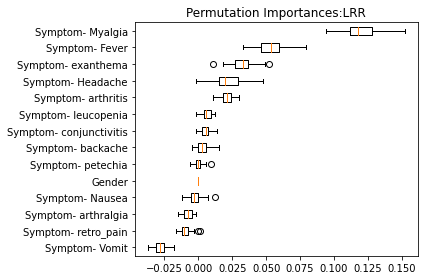

In [44]:
model=lg_without_regu_classif(X_train,y_train,lista_param[6])
feature_importance(X_train, X_val, y_train, y_val,model,'LRR')

# both_test_balanced

In [45]:
lista_param=[{},{},{'kernel': 'rbf', 'C': 9},
             {'weights': 'distance','n_neighbors': 8, 'n_jobs': -1,'leaf_size': 5, 'algorithm': 'brute'},
             {'n_estimators':500,'max_depth':5},
             {'solver': 'liblinear', 'penalty': 'l2','C': 0.1},
             {'solver': 'liblinear', 'penalty': 'l2','C': 1.0},
             {'max_iter': 1200,'solver':'lbfgs', 'alpha':1e-5, 'random_state':42},
            {'n_estimators':300,'max_depth':9,'min_child_weight': 2}]

In [46]:
x_both=data_both.iloc[:,:14]
y_both=data_both['Class']
X_train, X_val, y_train, y_val  = train_test_split(x_both,y_both, 
                                  test_size=0.5,random_state=0,stratify=y_both)

Symptom- Myalgia0.211 +/- 0.008
Symptom- Headache0.160 +/- 0.009
Symptom- exanthema0.123 +/- 0.006
Symptom- Fever0.081 +/- 0.006
Symptom- Vomit0.078 +/- 0.007
Symptom- Nausea0.058 +/- 0.004
Symptom- arthralgia0.044 +/- 0.005
Symptom- retro_pain0.042 +/- 0.004
Gender  0.038 +/- 0.005
Symptom- leucopenia0.034 +/- 0.004
Symptom- petechia0.026 +/- 0.002
Symptom- backache0.016 +/- 0.003
Symptom- arthritis0.012 +/- 0.002
Symptom- conjunctivitis0.007 +/- 0.002


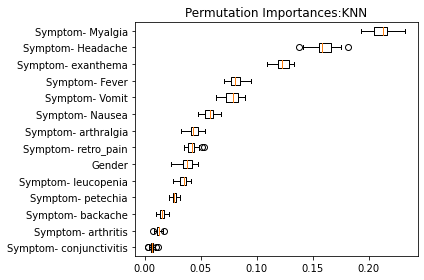

In [47]:
model=Kneighbors_classif(X_train,y_train,lista_param[3])
feature_importance(X_train, X_val, y_train, y_val,model,'KNN')


Symptom- Myalgia0.194 +/- 0.008
Symptom- Headache0.137 +/- 0.007
Symptom- exanthema0.106 +/- 0.006
Symptom- Fever0.080 +/- 0.006
Symptom- Vomit0.064 +/- 0.006
Symptom- Nausea0.042 +/- 0.005
Symptom- retro_pain0.041 +/- 0.004
Symptom- arthralgia0.040 +/- 0.005
Symptom- leucopenia0.035 +/- 0.004
Symptom- petechia0.029 +/- 0.003
Gender  0.017 +/- 0.004
Symptom- conjunctivitis0.013 +/- 0.002
Symptom- backache0.013 +/- 0.003
Symptom- arthritis0.013 +/- 0.003


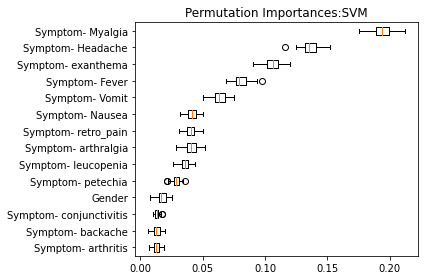

In [48]:
model= svc_classif(X_train,y_train,lista_param[2])
feature_importance(X_train, X_val, y_train, y_val,model,'SVM')

Symptom- Myalgia0.197 +/- 0.008
Symptom- Headache0.141 +/- 0.007
Symptom- exanthema0.110 +/- 0.007
Symptom- Fever0.085 +/- 0.006
Symptom- Vomit0.064 +/- 0.006
Symptom- Nausea0.043 +/- 0.005
Symptom- arthralgia0.041 +/- 0.005
Symptom- retro_pain0.041 +/- 0.004
Symptom- leucopenia0.031 +/- 0.004
Symptom- petechia0.026 +/- 0.003
Gender  0.021 +/- 0.004
Symptom- arthritis0.015 +/- 0.003
Symptom- conjunctivitis0.013 +/- 0.002
Symptom- backache0.006 +/- 0.003


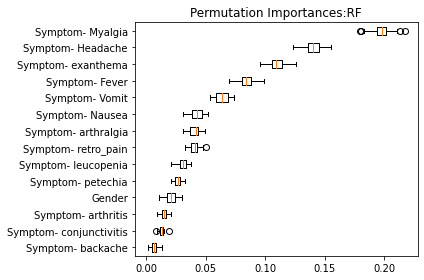

In [49]:
model=RandomForest_classif(X_train,y_train,lista_param[1])
feature_importance(X_train, X_val, y_train, y_val,model,'RF')

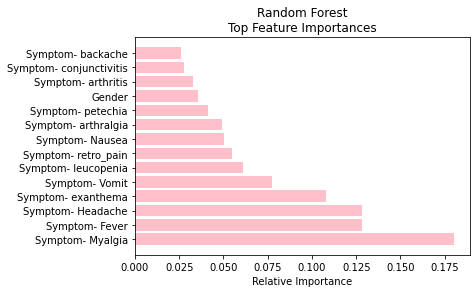

In [50]:
model_rf= RandomForest_classif(x_both,y_both,lista_param[1])
importance_rf=calculate_feature_importance(model_rf)
plot_feature_importance(importance_rf,'pink','Random Forest')

In [51]:
importance_rf

Symptom- Myalgia           0.180127
Symptom- Fever             0.128350
Symptom- Headache          0.128057
Symptom- exanthema         0.107723
Symptom- Vomit             0.077269
Symptom- leucopenia        0.060908
Symptom- retro_pain        0.054722
Symptom- Nausea            0.050296
Symptom- arthralgia        0.049180
Symptom- petechia          0.041004
Gender                     0.035795
Symptom- arthritis         0.032804
Symptom- conjunctivitis    0.027671
Symptom- backache          0.026096
dtype: float64

Symptom- Myalgia0.198 +/- 0.009
Symptom- Headache0.140 +/- 0.008
Symptom- exanthema0.131 +/- 0.007
Symptom- Fever0.089 +/- 0.007
Symptom- Vomit0.063 +/- 0.006
Symptom- Nausea0.051 +/- 0.005
Symptom- retro_pain0.047 +/- 0.004
Symptom- arthralgia0.046 +/- 0.005
Symptom- leucopenia0.044 +/- 0.004
Symptom- petechia0.034 +/- 0.003
Gender  0.021 +/- 0.003
Symptom- backache0.015 +/- 0.003
Symptom- conjunctivitis0.012 +/- 0.002
Symptom- arthritis0.010 +/- 0.003


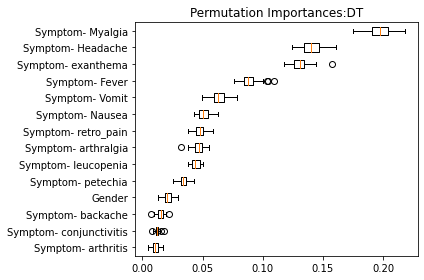

In [52]:
model=DecisionTree_classif(X_train,y_train,lista_param[0])
feature_importance(X_train, X_val, y_train, y_val,model,'DT')

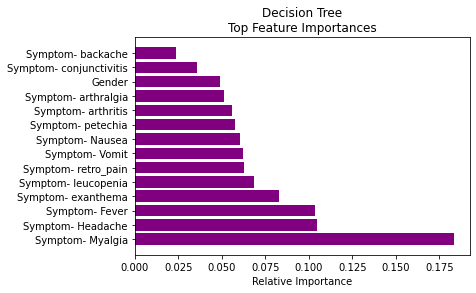

In [53]:
model_dt= DecisionTree_classif(x_both,y_both,lista_param[0])
importance_dt=calculate_feature_importance(model_dt)
plot_feature_importance(importance_dt,'purple','Decision Tree')

In [54]:
importance_dt

Symptom- Myalgia           0.183280
Symptom- Headache          0.104839
Symptom- Fever             0.103511
Symptom- exanthema         0.082816
Symptom- leucopenia        0.068640
Symptom- retro_pain        0.062438
Symptom- Vomit             0.061896
Symptom- Nausea            0.060411
Symptom- petechia          0.057602
Symptom- arthritis         0.055601
Symptom- arthralgia        0.051058
Gender                     0.048799
Symptom- conjunctivitis    0.035731
Symptom- backache          0.023379
dtype: float64

Symptom- Myalgia0.200 +/- 0.009
Symptom- Headache0.145 +/- 0.008
Symptom- exanthema0.132 +/- 0.007
Symptom- Fever0.085 +/- 0.006
Symptom- Vomit0.067 +/- 0.006
Symptom- Nausea0.045 +/- 0.005
Symptom- retro_pain0.045 +/- 0.004
Symptom- arthralgia0.039 +/- 0.006
Symptom- leucopenia0.035 +/- 0.004
Symptom- petechia0.028 +/- 0.003
Gender  0.026 +/- 0.005
Symptom- arthritis0.014 +/- 0.002
Symptom- backache0.014 +/- 0.003
Symptom- conjunctivitis0.014 +/- 0.002


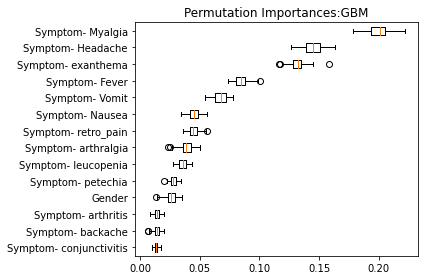

In [55]:
model=gb_classif(X_train,y_train,lista_param[4])
feature_importance(X_train, X_val, y_train, y_val,model,'GBM')

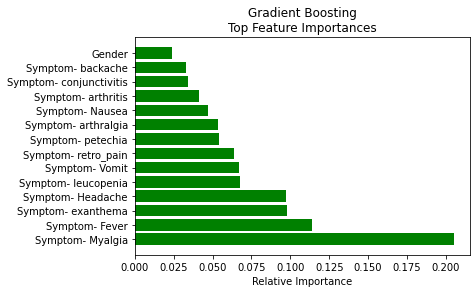

In [56]:
model_gb=gb_classif(x_both,y_both,lista_param[4])
importance_gb=calculate_feature_importance(model_gb)
plot_feature_importance(importance_gb,'green','Gradient Boosting')


In [57]:
importance_gb

Symptom- Myalgia           0.205195
Symptom- Fever             0.113949
Symptom- exanthema         0.097687
Symptom- Headache          0.097404
Symptom- leucopenia        0.067835
Symptom- Vomit             0.067008
Symptom- retro_pain        0.063446
Symptom- petechia          0.054335
Symptom- arthralgia        0.053645
Symptom- Nausea            0.046867
Symptom- arthritis         0.041323
Symptom- conjunctivitis    0.034354
Symptom- backache          0.033018
Gender                     0.023934
dtype: float64

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[22:22:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Symptom- Myalgia0.203 +/- 0.008
Symptom- Headache0.143 +/- 0.007
Symptom- exanthema0.106 +/- 0.007
Symptom- Fever0.083 +/- 0.006
Symptom- Vomit0.069 +/- 0.006
Symptom- arthralgia0.048 +/- 0.005
Symptom- Nausea0.048 +/- 0.005
Symptom- retro_pain0.044 +/- 0.004
Symptom- leucopenia0.036 +/- 0.004
Symptom- petechia0.028 +/- 0.003
Gender  0.022 +/- 0.004
Symptom- arthritis0.020 +/- 0.003
Symptom- backache0.015 +/- 0.003
Symptom- conjunctivitis0.013 +/- 0.002


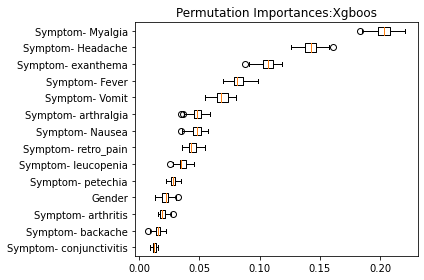

In [58]:
model=xgb_classif(X_train,y_train,lista_param[8])
feature_importance(X_train, X_val, y_train, y_val,model,'Xgboos')

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[22:23:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


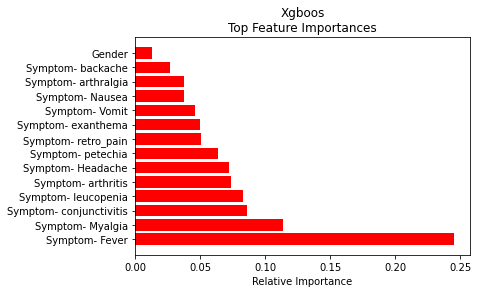

In [59]:
model_xgb=xgb_classif(x_both,y_both,lista_param[8])
importance_xgb=calculate_feature_importance(model_xgb)
plot_feature_importance(importance_xgb,'red','Xgboos')

In [60]:
importance_xgb

Symptom- Fever             0.245007
Symptom- Myalgia           0.113470
Symptom- conjunctivitis    0.085737
Symptom- leucopenia        0.082943
Symptom- arthritis         0.074119
Symptom- Headache          0.072147
Symptom- petechia          0.063840
Symptom- retro_pain        0.050703
Symptom- exanthema         0.050127
Symptom- Vomit             0.046468
Symptom- Nausea            0.037931
Symptom- arthralgia        0.037376
Symptom- backache          0.026670
Gender                     0.013463
dtype: float32

Symptom- Myalgia0.202 +/- 0.008
Symptom- Headache0.159 +/- 0.008
Symptom- exanthema0.121 +/- 0.007
Symptom- Fever0.094 +/- 0.006
Symptom- Vomit0.081 +/- 0.006
Symptom- Nausea0.059 +/- 0.006
Symptom- arthralgia0.057 +/- 0.004
Symptom- retro_pain0.047 +/- 0.004
Symptom- leucopenia0.041 +/- 0.003
Gender  0.035 +/- 0.004
Symptom- petechia0.033 +/- 0.003
Symptom- backache0.022 +/- 0.004
Symptom- conjunctivitis0.017 +/- 0.002
Symptom- arthritis0.015 +/- 0.003


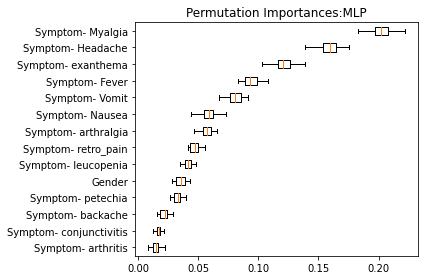

In [61]:
model=mpl_classif(X_train,y_train,lista_param[7])
feature_importance(X_train, X_val, y_train, y_val,model,'MLP')

Symptom- Myalgia0.162 +/- 0.010
Symptom- Fever0.071 +/- 0.008
Symptom- exanthema0.027 +/- 0.005
Symptom- Headache0.026 +/- 0.006
Symptom- arthritis0.015 +/- 0.003
Gender  0.011 +/- 0.003
Symptom- backache0.007 +/- 0.003
Symptom- conjunctivitis0.005 +/- 0.002
Symptom- leucopenia0.002 +/- 0.003
Symptom- petechia0.000 +/- 0.003
Symptom- arthralgia-0.001 +/- 0.001
Symptom- Nausea-0.004 +/- 0.002
Symptom- Vomit-0.008 +/- 0.003
Symptom- retro_pain-0.009 +/- 0.002


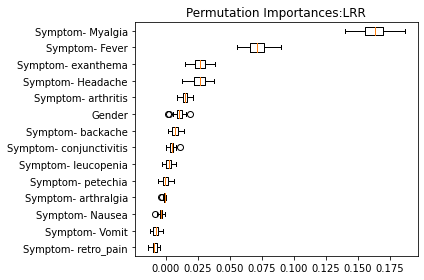

In [62]:
model=lg_with_regu_classif(X_train,y_train,lista_param[5])
feature_importance(X_train, X_val, y_train, y_val,model,'LRR')

Symptom- Myalgia0.165 +/- 0.010
Symptom- Fever0.076 +/- 0.008
Symptom- Headache0.068 +/- 0.006
Symptom- exanthema0.042 +/- 0.006
Symptom- arthritis0.023 +/- 0.003
Symptom- leucopenia0.019 +/- 0.003
Symptom- conjunctivitis0.013 +/- 0.003
Symptom- arthralgia0.010 +/- 0.002
Symptom- backache0.009 +/- 0.003
Symptom- petechia0.007 +/- 0.003
Gender  0.007 +/- 0.003
Symptom- Nausea0.005 +/- 0.002
Symptom- Vomit0.002 +/- 0.003
Symptom- retro_pain-0.004 +/- 0.002


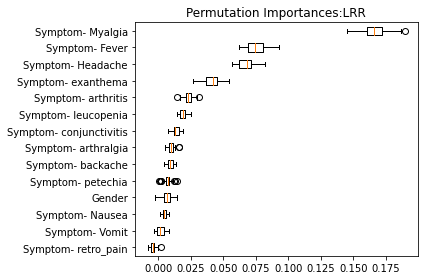

In [63]:
model=lg_without_regu_classif(X_train,y_train,lista_param[6])
feature_importance(X_train, X_val, y_train, y_val,model,'LRR')